In [1]:
# This program plots highly eccentric planetary motion using leapfrog_tt.
# Author: Alex Correia
# Date: 6/17/21

import numpy as np
from compy import ode #custom module, need compy from https://github.com/com-py/compy
import vpython as vp
vec=vp.vector #use vpython to define vectors

d = 0 # modify power of s

#compute eqns of motion by leapfrog method
def earth(id, r, v, t):            # diffeq to be supplied to ode.leapfrog
    if (id == 0): return v         # returns f(r) = dr/dt for id == 0, else returns f(v) = dv/dt
    s = vp.mag(vec(r[0],r[1],0))   # s = magnitude of displacement vector r
    return -GM*r/(s**(3+d))        # acceleration eqn of motion

#animate planetary motion
def go():
    r = np.array([0.8, 0.0])     # initial x,y position for earth   
    v = np.array([0.0, 3.5])     # initial vx, vy
    w = 1.0/vp.mag(vec(r[0], r[1], 0))
    
    # draw the scene, planet earth/path, sun/sunlight               
    scene = vp.canvas(title='Planetary motion', background=vec(.2,.5,1), forward=vec(0,2,-1)) # set up animation
    planet = vp.sphere(pos=vec(r[0],r[1],0), radius=0.1, make_trail=True, up=vec(0,0,1)) # planet w/ trail
    arrow = vp.arrow(pos=vec(r[0],r[1],0), up=vec(0,0,1)) # arrow showing velocity
    sun = vp.sphere(pos=vec(0,0,0), radius=0.2, color=vp.color.yellow) # place sun at center of coordinate space
    sunlight = vp.local_light(pos=vec(0,0,0), color=vp.color.yellow) # light source from sun
    
    t, h = 0.0, 0.01 # t = time, h = timestep
    while True:
        vp.rate(50) # animation rate, lower rate gives smoother path, higher rate gives faster animation
        r, v, t, w = ode.leapfrog_tt(earth, r, v, t, w, h) # use leapfrog method to solve ODEs
        planet.pos = vec(r[0],r[1],0) # move planet in animation based on current integration   
        arrow.pos = vec(r[0],r[1],0) # arrow always on planet
        arrow.axis = vec(v[0],v[1],0)/vp.mag(vec(v[0],v[1],0)) # direction of arrow is unit vector of v
        
GM = 4*np.pi*np.pi # constant used in earth()
go()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

Please enter lambda, eg: 0.01, or 1.1E-8 :> 0.01


<IPython.core.display.Javascript object>


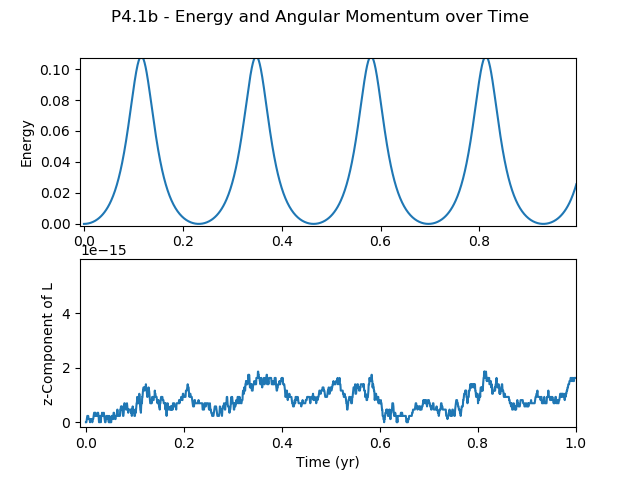

In [29]:
# This program calculates and plots the energy and angular momentum of Mercury's orbit.

import numpy as np 
from compy import ode
import vpython as vp
import matplotlib.pyplot as plt
import sys
%matplotlib notebook
vec=vp.vector

# relativistic eqns of motion
def mercury(id, r, v, t):
    if (id == 0): return v                      # velocity, dr/dt
    s = vp.mag(vec(r[0],r[1],r[2]))             # displacement scalar
    return -GM*r*(1.0 + lamb/(s*s))/(s*s*s)     # acceleration, dv/dt

# visualization
def set_scene(r):
    scene = vp.canvas(title='Precession of Mercury', center=vec(.1*0,0,0), background=vec(.2,.5,1))
    planet= vp.sphere(pos=r, color=vec(.9,.6,.4), make_trail=True, radius=0.05)
    sun   = vp.sphere(pos=vec(0,0,0), color=vp.color.yellow, radius=0.02)
    sunlight = vp.local_light(pos=vec(0,0,0), color=vp.color.yellow)
    info = vp.label(pos=vec(.3,-.4,0), text='Angle') # angle info
    RLvec = vp.arrow(pos=vec(0,0,0), axis=vec(-1,0,0), length = 0.25)
    return planet, info, RLvec
    
def energy(r, v, L): # calculate energy using a function
    V = -GM/vp.mag(r)                    # potential
    T = vp.dot(v, v)/2                  # kinetic
    return T+V
    
def go(animate = True):
    r, v = np.array([0.4667, 0.0, 0.]), np.array([0.0, 8.198, 0.]) # initial conditions
    t, h, ta, angle = 0.0, 0.002, [], []
    rvec=vec(r[0],r[1],r[2])
    w = 1.0/vp.mag(rvec) # define W for tt
    Elist = []  # list of energies
    Llist = []  # list of angular momenta
    Eerror = [] # energy errors
    Lerror = [] # momentum errors
    
    if (animate): planet, info, RLvec = set_scene(rvec)
    while t<10:                            # run for 10 years
        rvec=vec(r[0],r[1],r[2])
        vvec=vec(v[0],v[1],v[2])
        L = vp.cross(rvec, vvec)            # calculate scaled angular momentum
        A = vp.cross(vvec, L) - GM*rvec/vp.mag(rvec) # calculate Runge-Lenz vector
        E = energy(rvec, vvec, L) #assign variable for energy calculation
        ta.append(t)
        angle.append(np.arctan(A.y/A.x)*180*3600/np.pi) # arcseconds
        if (animate):    
            vp.rate(100)   
            planet.pos = rvec                           # move planet
            RLvec.axis, RLvec.length = A, .25           # update RL vec
            info.text='Angle": %8.2f' %(angle[-1])      # angle info 
        r, v, t, w = ode.leapfrog_tt(mercury, r, v, t, w, h)
        Llist.append(vp.dot(L, vec(0,0,1)))
        Elist.append(E)
        Lerror.append(abs((Llist[-1] - Llist[0])/Llist[0]))
        Eerror.append(abs((Elist[-1] - Elist[0])/Elist[0]))

    # plot energy and ang momentum over time
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle("P4.1b - Energy and Angular Momentum over Time")
    ax1.plot(ta, Eerror)
    ax2.plot(ta, Lerror)
    ax1.set_ylabel('Energy')
    ax2.set_xlabel('Time (yr)'), ax2.set_ylabel('z-Component of L')
    plt.show()

GM = 4*np.pi*np.pi # solar gravitational constant

if (sys.version_info[0] < 3): # version differentiation; both bring up textbox to type in lambda
    lamb = input('Please enter lambda, eg: 0.01, or 1.1E-8 :> ')
else:
    lamb = eval(input('Please enter lambda, eg: 0.01, or 1.1E-8 :> '))
go(animate = False)      # set to False to speed up calc. for plots

Please enter lambda, eg: 0.01, or 1.1E-8 :> 1.1E-8


<IPython.core.display.Javascript object>


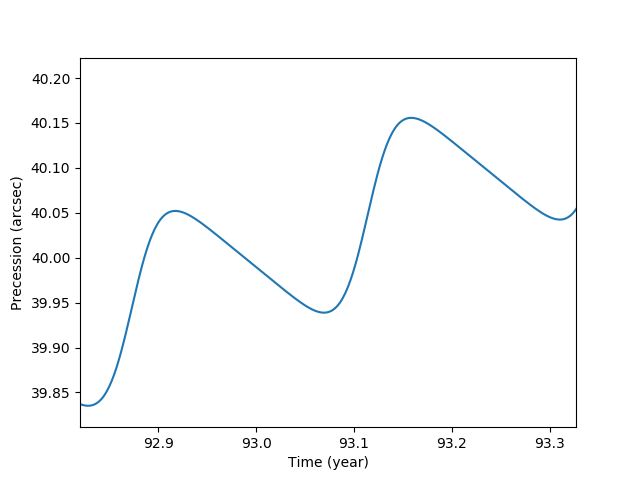

In [41]:
# This program is a copy of Program 4.3 to better observe the precession figure supplied by the original.

import numpy as np 
from compy import ode           # get ODE solvers, numpy
import vpython as vp            # get VPython modules for animation
import matplotlib.pyplot as plt # get matplotlib plot functions
import sys
%matplotlib notebook
vec=vp.vector

def mercury(id, r, v, t):       # eqns of motion for mercury
    if (id == 0): return v      # velocity, dr/dt
    s = vp.mag(vec(r[0],r[1],r[2]))
    return -GM*r*(1.0 + lamb/(s*s))/(s*s*s)     # acceleration, dv/dt

def set_scene(r):     # r = init position of planet
    # draw scene, mercury, sun, info box, Runge-Lenz vector
    scene = vp.canvas(title='Precession of Mercury', center=vec(.1*0,0,0), background=vec(.2,.5,1))
    planet= vp.sphere(pos=r, color=vec(.9,.6,.4), make_trail=True, radius=0.05)
    sun   = vp.sphere(pos=vec(0,0,0), color=vp.color.yellow, radius=0.02)
    sunlight = vp.local_light(pos=vec(0,0,0), color=vp.color.yellow)
    info = vp.label(pos=vec(.3,-.4,0), text='Angle') # angle info
    RLvec = vp.arrow(pos=vec(0,0,0), axis=vec(-1,0,0), length = 0.25)
    return planet, info, RLvec
    
def go(animate = True):                     # default: True
    r, v = np.array([0.4667, 0.0, 0.]), np.array([0.0, 8.198, 0.]) # init r, v
    t, h, ta, angle = 0.0, 0.004, [], []
    rvec=vec(r[0],r[1],r[2])
    w = 1.0/vp.mag(rvec)                       # $W_0=\Omega(r)$
    
    if (animate): planet, info, RLvec = set_scene(rvec)
    while t<100:                            # run for 10 years
        rvec=vec(r[0],r[1],r[2])
        vvec=vec(v[0],v[1],v[2])
        L = vp.cross(rvec, vvec)            # $\vec{L}/m=\vec{r}\times \vec{v}$
        A = vp.cross(vvec, L) - GM*rvec/vp.mag(rvec) # scaled RL vec, 
        ta.append(t)
        angle.append(np.arctan(A.y/A.x)*180*3600/np.pi) # arcseconds
        if (animate):    
            vp.rate(100)   
            planet.pos = rvec                           # move planet
            RLvec.axis, RLvec.length = A, .25           # update RL vec
            info.text='Angle": %8.2f' %(angle[-1])      # angle info 
        r, v, t, w = ode.leapfrog_tt(mercury, r, v, t, w, h)
        
    plt.figure()
    plt.plot(ta, angle)
    plt.xlabel('Time (year)'), plt.ylabel('Precession (arcsec)')
    plt.show()

GM = 4*np.pi*np.pi
lamb = eval(input('Please enter lambda, eg: 0.01, or 1.1E-8 :> '))
go(animate = False)

In [ ]:
'''
Observations:

a) The program produces the same highly elliptical orbit, but unlike E4.3 the orbit never precesses for values of h as high
as 0.01. Since the orbit of Mercury is highly eccentric, the force field singularity at r = 0 causes numerical noise when
using leapfrog. Using the time transformation allows for smaller timesteps at perihelion, limiting the amount of numerical
noise that arises from this singularity and removing the artificial precession that arose from it.

b) The angular momentum of the orbit appears to have very minor fluctuations throughout the ten year period, with a
maximum deviation of ~1E-14. This very small error over the ten-year period may just be a numerical artifact, and even if
not it would be small enough to assume the angular momentum is functionally constant. Meanwhile, energy appears to have this
same behavior only in the classical example (i.e. lamb = 0). When plotted with the suggested lamb = 0.01, the energy of the
orbit appears to oscillate over a much larger range of energy values. Rather than fluctuate over ~1E-14, the error in energy
appears to oscillate over 1E-1 in correspondance with its orbit (~4 times per year). As such, it can be assumed that
angular momentum is conserved for any lambda, while energy is only conserved for classical orbits and is not conserved when
relativity is observed.

c) For h = 0.002, each oscillation appears to have a period of ~0.25 yr and an amplitude of ~0.1". Changing the direction of
lambda does change the direction of precession, with a clear negative trend compared to the positive trend of the previous
graph. For h = 0.001 and h = 0.004, the oscillations have the same period and amplitude.
'''